<a href="https://colab.research.google.com/github/PedroMesquitaIsidoro/RedesNeurais/blob/main/Perceptron/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

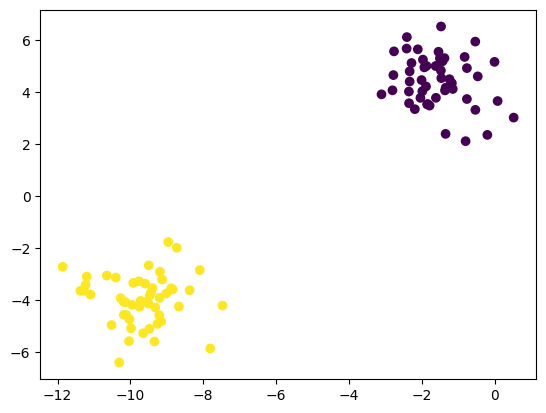

In [ ]:
# DADOS
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, cluster_std=1, random_state=1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# **Pré-processamento**

In [ ]:
import numpy as np

In [ ]:
#conta a quantidade de amostras nos dados da variavel y
print('', np.bincount(y))
#linhas e colunas de X
print('', X.shape)
#linhas e colunas de y
print('', y.shape)

 [50 50]
 (100, 2)
 (100,)


In [ ]:
#Embaralhando os dados para depois separar em dados de treinamento e teste
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)

X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]


In [ ]:
#Normalizando
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu)/ sigma
X_test = (X_test - mu)/ sigma


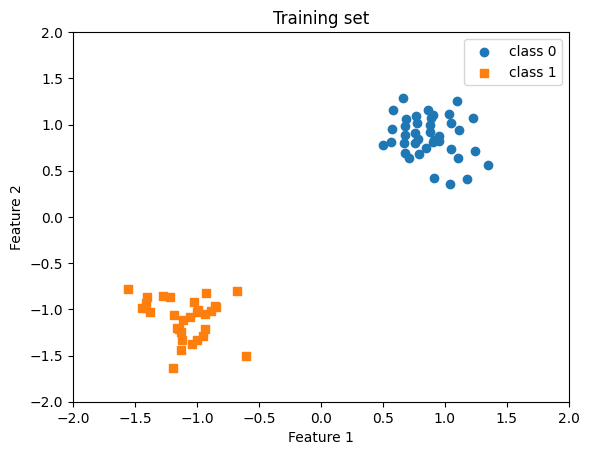

In [ ]:
#Plot dados de treino
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='class 0', marker = 'o')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='class 1', marker = 's')
plt.title('Training set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.show()

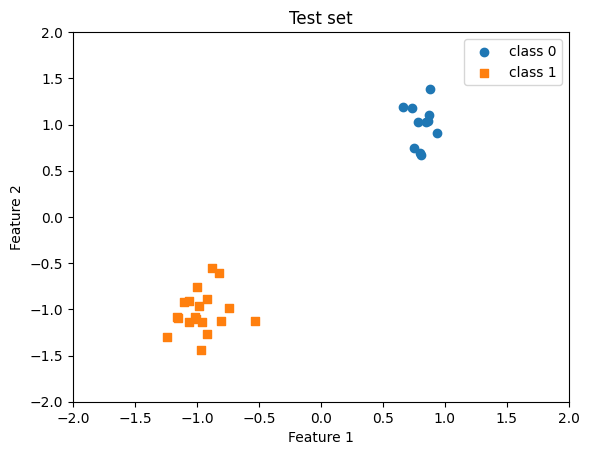

In [ ]:
#Plot dados de teste
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='class 0', marker = 'o')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='class 1', marker = 's')
plt.title('Test set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.show()

# **Aprendizagem**

In [ ]:
#Definindo o perceptron
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float)
        self.bias = np.zeros(1, dtype=np.float)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions

    def backward(self, x, y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors

    def train(self, x, y, epochs):
        for e in range(epochs):

            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors

                print('Model parameters epoch %d: \n' %e)
                print('  Weights: %s' % ppn.weights)
                print('  Bias: %s\n' % ppn.bias)

    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

In [ ]:
#Treinando o perceptron
ppn = Perceptron(num_features=2)
ppn.train(X_train, y_train, epochs = 5)

<ipython-input-55-2817346d709b>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.weights = np.zeros((num_features, 1), dtype=np.float)
<ipython-input-55-2817346d709b>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.bias = np.zeros(1, dtype=np.float)


Model parameters epoch 0: 

  Weights: [[-1.41927752]
 [-0.99101338]]
  Bias: [1.]

Model parameters epoch 0: 

  Weights: [[-1.41927752]
 [-0.99101338]]
  Bias: [1.]

Model parameters epoch 0: 

  Weights: [[-1.41927752]
 [-0.99101338]]
  Bias: [1.]

Model parameters epoch 0: 

  Weights: [[-1.41927752]
 [-0.99101338]]
  Bias: [1.]

Model parameters epoch 0: 

  Weights: [[-1.41927752]
 [-0.99101338]]
  Bias: [1.]

Model parameters epoch 0: 

  Weights: [[-1.41927752]
 [-0.99101338]]
  Bias: [1.]

Model parameters epoch 0: 

  Weights: [[-1.41927752]
 [-0.99101338]]
  Bias: [1.]

Model parameters epoch 0: 

  Weights: [[-1.41927752]
 [-0.99101338]]
  Bias: [1.]

Model parameters epoch 0: 

  Weights: [[-1.41927752]
 [-0.99101338]]
  Bias: [1.]

Model parameters epoch 0: 

  Weights: [[-1.41927752]
 [-0.99101338]]
  Bias: [1.]

Model parameters epoch 0: 

  Weights: [[-1.41927752]
 [-0.99101338]]
  Bias: [1.]

Model parameters epoch 0: 

  Weights: [[-1.41927752]
 [-0.99101338]]
  Bias

In [ ]:
#Avaliando o modelo
test_acc = ppn.evaluate(X_test, y_test)
print('Accuracy: %.2f%%' %(test_acc*100))

Accuracy: 100.00%


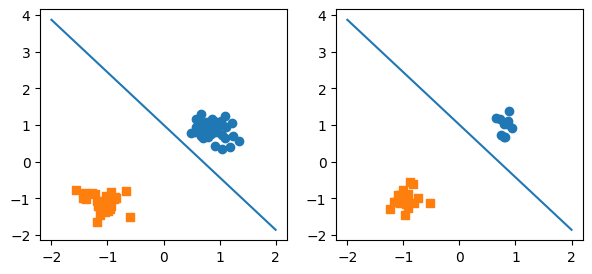

In [65]:
#Plot linha de decisao
w, b = ppn.weights, ppn.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0])
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0])
          / w[1] )

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7,3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker ='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker ='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker ='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker ='s')


plt.show()